# **Problem Statement**


1. A credit card is a small thin plastic or fiber card that incorporates
information about the person such as a picture or signature and the
person’s name on it to charge purchases and services to his linked
account. Charges are debited regularly. Nowadays, card data is read by
ATMs, swiping machines, store readers, banks and online transactions.
2. Each card has a unique card number which is very important. Its security
mainly relies on the physical security of the card and also the privacy of the
credit card number. There is a rapid growth in credit card transactions
which has led to substantial growth in scam cases.
3. Credit card fraud is expanding heavily because fraud financial loss is
increasing drastically. Multiple data mining and statistical techniques are
used to catch fraud. Therefore the detection of fraud using efficient and
secured methods are very important.

**Importing The Necessary Libraries**

In [1]:
import pandas as pd #data manipulation
import numpy as np  #numerical python
import matplotlib.pyplot as plt #data visualization
%matplotlib inline
import seaborn as sns #data visualization
import plotly.express as px #data visualization
import plotly.graph_objects as go #data visualization
from plotly.subplots import make_subplots #to make subplots
import warnings
warnings.filterwarnings('ignore') #to ignore warnings

In [2]:
from sklearn.preprocessing import StandardScaler #for rescalling the data
from sklearn.preprocessing import LabelEncoder #for encoding
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import*

**Importing The Dataset**

In [3]:
df=pd.read_csv('/content/creditcard.csv.crdownload')

**Interpreting The Dataset**

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11665 non-null  int64  
 1   V1      11665 non-null  float64
 2   V2      11665 non-null  float64
 3   V3      11665 non-null  float64
 4   V4      11665 non-null  float64
 5   V5      11665 non-null  float64
 6   V6      11665 non-null  float64
 7   V7      11665 non-null  float64
 8   V8      11665 non-null  float64
 9   V9      11665 non-null  float64
 10  V10     11665 non-null  float64
 11  V11     11665 non-null  float64
 12  V12     11664 non-null  float64
 13  V13     11664 non-null  float64
 14  V14     11664 non-null  float64
 15  V15     11664 non-null  float64
 16  V16     11664 non-null  float64
 17  V17     11664 non-null  float64
 18  V18     11664 non-null  float64
 19  V19     11664 non-null  float64
 20  V20     11664 non-null  float64
 21  V21     11664 non-null  float64
 22

In [6]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
df['Amount'].describe()

,Amount
count,11664.000000
mean,62.795132
std,179.816783
min,0.000000
25%,5.000000
50%,15.950000
75%,50.000000
max,7712.430000


the amount column is rightly skewed and not normally distributed

<Axes: xlabel='Amount', ylabel='Density'>

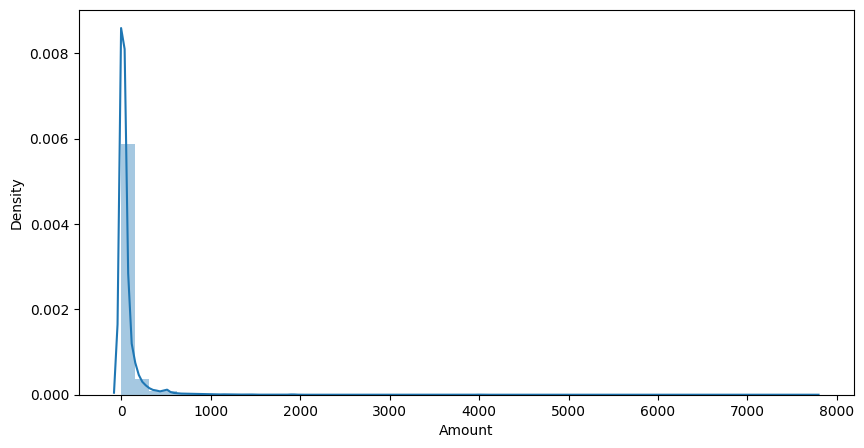

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(df['Amount'])

<Axes: >

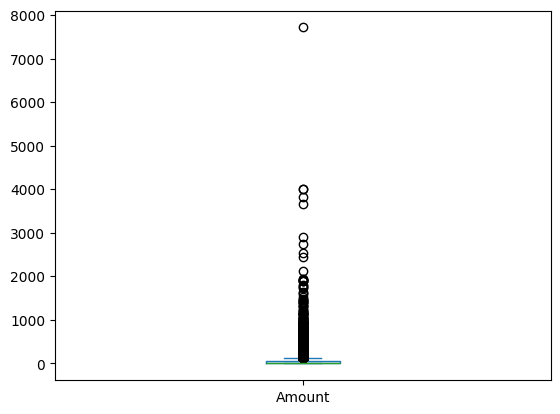

In [9]:
df['Amount'].plot(kind='box')

amount column has outliers and right skewed distribution .

**Imputing The Missing Values**

In [10]:
df['Amount']=df['Amount'].fillna(df['Amount'].median())
df['Amount'].isnull().sum()

np.int64(0)

In [11]:

df.dropna(subset=['Class'], inplace=True)
df['Class'].isna().sum()

np.int64(0)

In [12]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**Data Visualization**

In [13]:
count=df['Class'].value_counts()

In [14]:
fraud=count[1]
non_fraud=count[0]
total=len(df)
fraud_percent=(fraud/total)*100
non_fraud_percent=(non_fraud/total)*100
print(f'Total number of Transactions are {total}')
print(f'Number of Fraudulent Transactions are {fraud} and percentage is {fraud_percent}')
print(f'Number of Non-Fraudulent Transactions are {non_fraud} and percentage is {non_fraud_percent}')

Total number of Transactions are 11664
Number of Fraudulent Transactions are 49 and percentage is 0.4200960219478738
Number of Non-Fraudulent Transactions are 11615 and percentage is 99.57990397805213


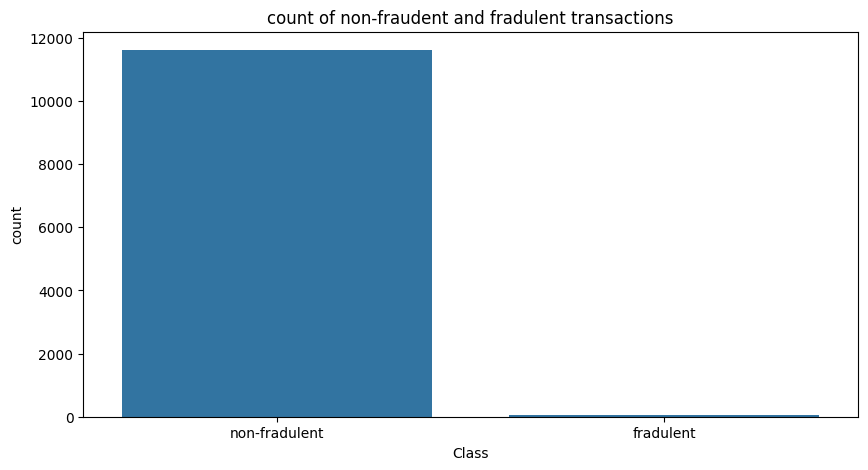

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x=df['Class'])
plt.xticks([0,1],['non-fradulent','fradulent'])
plt.title('count of non-fraudent and fradulent transactions')
plt.show()

**splitting the data into train and test data**

In [16]:
df.drop(['Time','Amount'],axis=1,inplace=True)
y=df['Class']
x=df.drop('Class',axis=1)
y=df['Class']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8164, 28) (3500, 28) (8164,) (3500,)


**class balancing**

In [18]:
sm=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=sm.fit_resample(x_train,y_train)

**standardizing the values**

In [19]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train_resampled)
x_test_scaled=sc.transform(x_test)

# **Decision tree**

In [20]:
model1=DecisionTreeClassifier()
model1.fit(x_train_scaled,y_train_resampled)

DecisionTreeClassifier()

In [21]:
y_pred1=model1.predict(x_test_scaled)


In [22]:
dt_accuracy=accuracy_score(y_test,y_pred1)
dt_precision=precision_score(y_test,y_pred1)
dt_recall=recall_score(y_test,y_pred1)
dt_f1=f1_score(y_test,y_pred1)
print("Accuracy:",dt_accuracy)
print("Precision:",dt_precision)
print("Recall:",dt_recall)
print("F1 Score:",dt_f1)

Accuracy: 0.9971428571428571
Precision: 0.6875
Recall: 0.6875
F1 Score: 0.6875


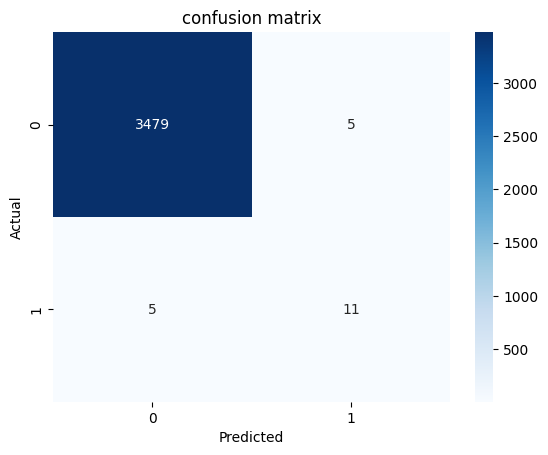

In [23]:
cm1=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm1,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Random Forest**

In [24]:
model2=RandomForestClassifier(n_estimators=10)
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [25]:
pred3=model2.predict(x_test_scaled)

In [26]:
rf_accuracy=accuracy_score(y_test,pred3)
rf_precision=precision_score(y_test,pred3)
rf_recall=recall_score(y_test,pred3)
rf_f1=f1_score(y_test,pred3)
print("Accuracy:",rf_accuracy)
print("Precision:",rf_precision)
print("Recall:",rf_recall)
print("F1 Score:",rf_f1)

Accuracy: 0.9954285714285714
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


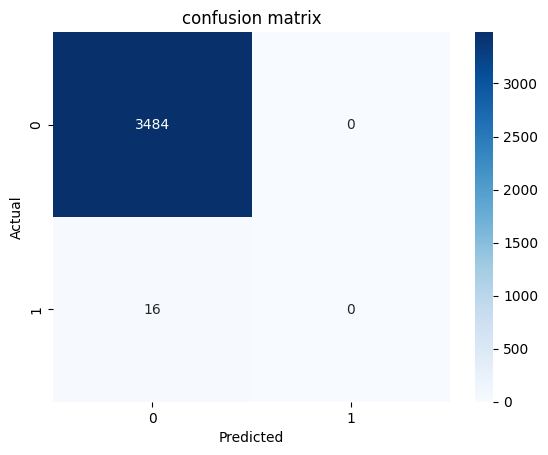

In [27]:
cm2=confusion_matrix(y_test,pred3)
sns.heatmap(cm2,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Accuracy score of both the models**

In [28]:
print(f'the accuracy of the decision tree is :{dt_accuracy:.4f}')
print(f'the accuracy of the random forest is :{rf_accuracy:.4f}')

the accuracy of the decision tree is :0.9971
the accuracy of the random forest is :0.9954
